### Predicción de la probabilidad de que un cliente impague un crédito en dos años

## Importamos datos
Dataset de Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit

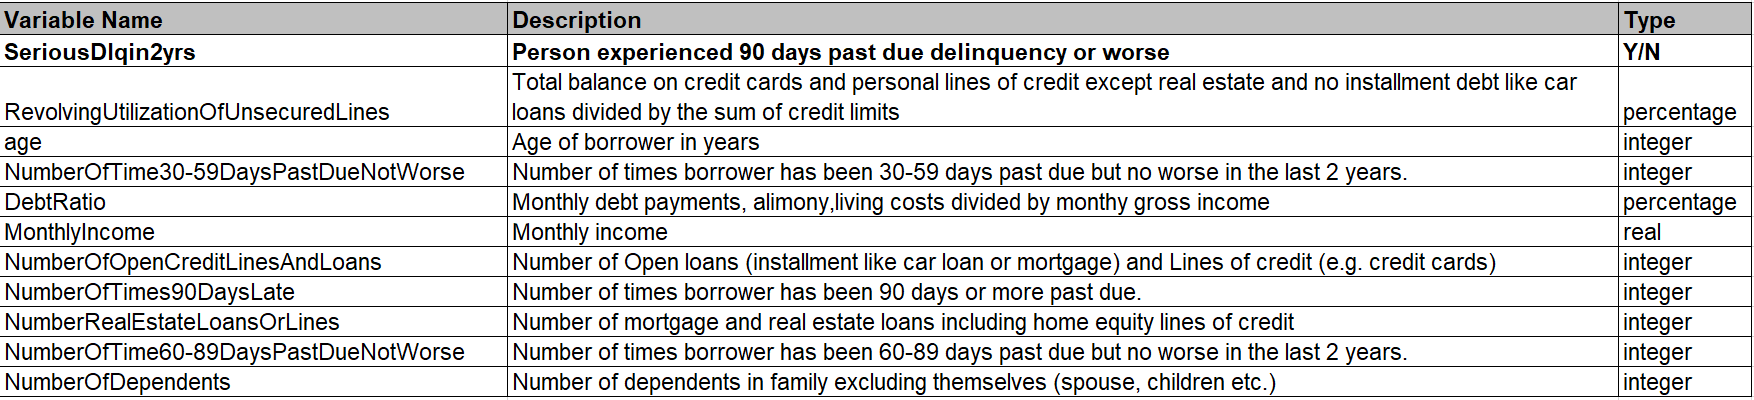

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Limpieza de datos

In [2]:
df.rename(columns={'SeriousDlqin2yrs': 'target'}, inplace=True)
df.head()

,Unnamed: 0,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.target.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: target, dtype: float64

Vemos que los datos están desbalanceados (hay muchos más ejemplos de la clase 0 que de la clase 1)

<AxesSubplot:xlabel='target', ylabel='count'>

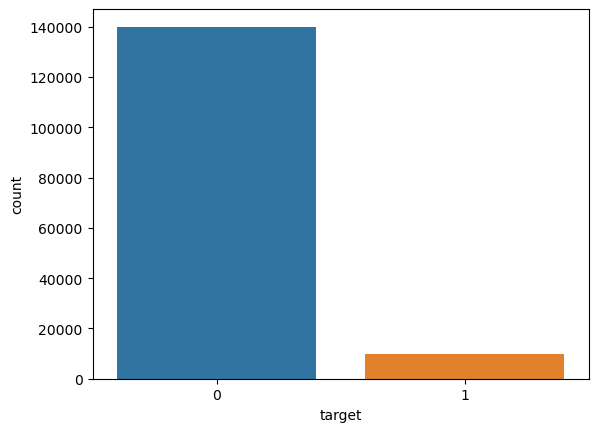

In [4]:
sns.countplot(data=df, x='target')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   target                                150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
df.loc[df.MonthlyIncome.isna()].groupby('target',as_index=False).count()[['target','age']]

,target,age
0,0,28062
1,1,1669


In [7]:
1669/(28062+1669)

0.05613669234132723

In [8]:
# Nos cargamos missings
df.dropna(inplace=True)

In [9]:
# Nos cargamos columnas inútiles
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [10]:
df.shape

(120269, 11)

In [11]:
df.target.value_counts()

0    111912
1      8357
Name: target, dtype: int64

In [12]:
df.target.value_counts(normalize=True)

0    0.930514
1    0.069486
Name: target, dtype: float64

## Dividimos el dataset

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

y_test.value_counts(normalize=True)

0    0.930531
1    0.069469
Name: target, dtype: float64

In [14]:
X_train.shape, X_test.shape

((96215, 10), (24054, 10))

In [15]:
X_train.index

Int64Index([ 50622, 149130, 129628, 132758,  49354,   8573,   9221, 110491,
             42575, 112636,
            ...
             14639, 130869,  49478,  10107, 116881,  50928,  18288,  16780,
            121492,  62440],
           dtype='int64', length=96215)

## Matriz de correlación

In [16]:
dftrain = df.loc[X_train.index]
dftrain

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50622,0,0.337581,41,0,0.690655,2000.0,6,0,1,0,1.0
149130,1,1.000000,31,0,0.106723,4000.0,5,0,0,3,0.0
129628,0,0.093061,67,0,0.158931,8833.0,9,0,2,0,0.0
132758,0,0.959315,46,1,1.107108,3080.0,10,0,0,0,0.0
49354,0,0.036646,68,0,0.587611,1694.0,15,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
50928,0,0.810693,60,3,0.185409,8100.0,7,0,0,1,5.0
18288,0,0.025948,28,0,0.201798,1000.0,2,0,0,0,0.0
16780,0,0.044615,56,0,0.312045,15250.0,10,0,2,0,0.0
121492,0,1.000000,47,0,0.220885,2077.0,6,0,0,0,0.0


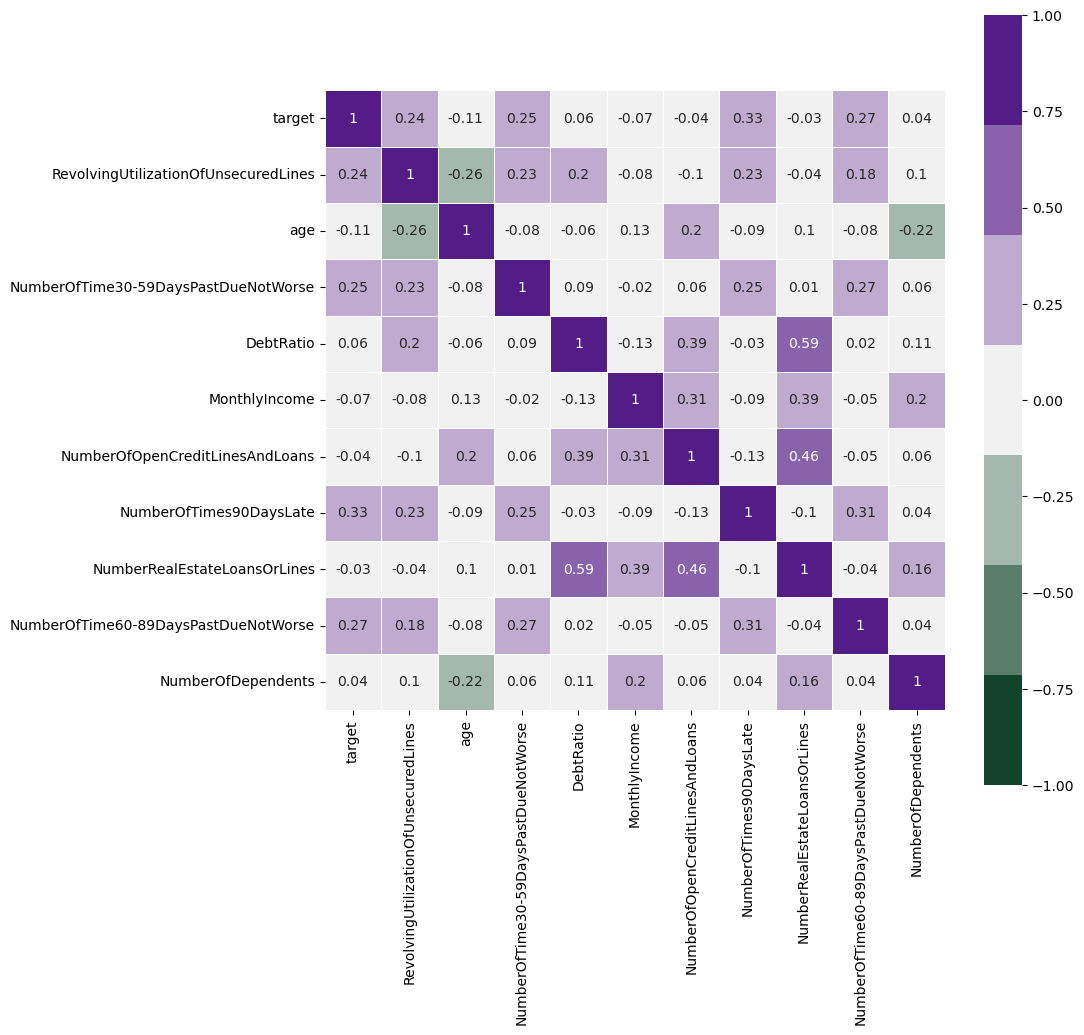

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(dftrain.corr(method='spearman'),2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            square=True,
            linewidths=0.5
           );

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

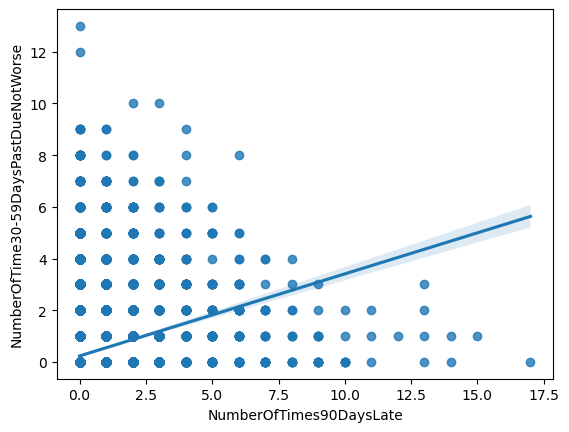

In [41]:
sns.regplot(dftrain.loc[dftrain['NumberOfTimes90DaysLate']<20]['NumberOfTimes90DaysLate'],
            dftrain.loc[dftrain['NumberOfTime30-59DaysPastDueNotWorse']<20]['NumberOfTime30-59DaysPastDueNotWorse'],'o')

In [17]:
dftrain[['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse']].corr(method='pearson')

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate,1.000000,0.975104
NumberOfTime30-59DaysPastDueNotWorse,0.975104,1.000000


In [18]:
dftrain[['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse']].corr(method='spearman')

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate,1.000000,0.248539
NumberOfTime30-59DaysPastDueNotWorse,0.248539,1.000000


In [19]:
np.corrcoef(dftrain.loc[dftrain['NumberOfTimes90DaysLate']<20]['NumberOfTimes90DaysLate'],
            dftrain.loc[dftrain['NumberOfTime30-59DaysPastDueNotWorse']<20]['NumberOfTime30-59DaysPastDueNotWorse'])

array([[1.        , 0.21790924],
       [0.21790924, 1.        ]])

In [20]:
# Correlaciones con el target
corr = np.abs(dftrain.corr(method='pearson')['target']).sort_values(ascending=False)
corr

target                                  1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.118798
NumberOfTimes90DaysLate                 0.107531
age                                     0.103863
NumberOfTime60-89DaysPastDueNotWorse    0.089627
NumberOfDependents                      0.044054
NumberOfOpenCreditLinesAndLoans         0.027483
MonthlyIncome                           0.020218
DebtRatio                               0.005295
NumberRealEstateLoansOrLines            0.002196
RevolvingUtilizationOfUnsecuredLines    0.001717
Name: target, dtype: float64

In [21]:
# Elimino variables con poca correlación con el target
bad_corr_feat = corr[corr<0.05]
bad_corr_feat = bad_corr_feat.index.values

X_train.drop(columns=bad_corr_feat, inplace=True)
X_test.drop(columns=bad_corr_feat, inplace=True)

X_train.columns

Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

## Modelo

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-0.02827351  0.50589762  0.4609311  -0.93136416]]
[-1.44007294]
[0 1]


Impago = sigmoid(-1.44 -0.028 * age + 0.505 * NumberOfTime30-59Days + 0.46 * NumberOfTimes90DaysLate - 0.93 * NumberOfTime60-89Days)

## Interpretación de coeficientes

In [58]:
coef_df = pd.DataFrame(log_reg.coef_[0], X_train.columns,
                      columns=['Coefficient'])
coef_df

,Coefficient
age,-0.028274
NumberOfTime30-59DaysPastDueNotWorse,0.505898
NumberOfTimes90DaysLate,0.460931
NumberOfTime60-89DaysPastDueNotWorse,-0.931364


¿Cómo interpretamos estos coeficientes?

Empecemos hablando de probabilidad. La probabilidad de que un evento ocurra es el número de veces que esperamos ver un resultado en numerosos intentos. Por ejemplo, la probabilidad de obtener un 4 en un dado es 1/6 = 16.7%.  
Por otro lado, las posibilidades de éxito (*odds ratio*) se definen como la probabilidad de que un evento ocurra dividido por la probabilidad de que el evento no ocurra. En el caso del dado, tendríamos 1/5, o un 20%. Esto es igual a p/(1-p) y representa el ratio entre la probabilidad de éxito y la probabilidad de fallo. 

En la Regresión Logística, se estiman las probabilidades con la fórmula:  

$\large p=\theta(w_0+w_1x_1+w_2x_2+...)$,

donde $\large \theta(s)=\frac{e^s}{1+e^s}$

La misma ecuación puede expresarse de la siguiente forma:  

$\large \ln(\frac{p}{1-p})= w_0+w_1x_1+w_2x_2+...$

Un incremento de 1 unidad en $x_1$, supone un incremento en $\ln(\frac{p}{1-p})$, que no es más que el logaritmo del *odds ratio*, también conocido como *logit* 

En este ejemplo, un incremento de una unidad en la variable `NumberOfTimes90DaysLate` supone un incremento de 0.439 en  $\ln(\frac{p}{1-p})$, esto es, $p/(1-p) = e^{0.439}=1.55$. Esto es un 55% de incremento en el *odds ratio* de necesitar un crédito a dos años vista.

Para la variable `age`, tenemos un coeficiente de -0.027, luego $p/(1-p) = e^{-0.027}=0.97$, es decir, el *odds ratio* se reduce un 3%.

Cuando $e^{w_i}$ es mayor que 1 ($w_i>0$), quiere decir que un aumento en la variable aumenta los *odds* de que ocurra el evento target.   
Cuando $e^{w_i}$ es menor que 1 ($w_i<0$), indica que un aumento en la variable reduce los *odds* de que ocurra el evento target. 

[Lecura recomendada](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

In [24]:
# Es posible obtener los p-values de los coeficientes con la librería statsmodels
import statsmodels.api as sm
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.234063
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                96215
Model:                          Logit   Df Residuals:                    96210
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                 0.07235
Time:                        20:27:53   Log-Likelihood:                -22520.
converged:                       True   LL-Null:                       -24277.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.4403      0.0

Los coeficientes no son los mismos porque sklearn aplica regularización por defecto! 

Podemos obtener el mismo resultado con sklearn desactivando la regularización

In [25]:
log_reg2 = LogisticRegression(penalty='none')
log_reg2.fit(X_train, y_train)
log_reg2.intercept_, log_reg2.coef_

(array([-1.44026491]),
 array([[-0.02827294,  0.50611064,  0.46136394, -0.93201253]]))

## Desempeño del modelo

In [26]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(log_reg2.predict(X_train), y_train)
acc_test = accuracy_score(log_reg2.predict(X_test), y_test)

print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

Accuracy train: 0.9312269396663722
Accuracy test: 0.9310717552174275


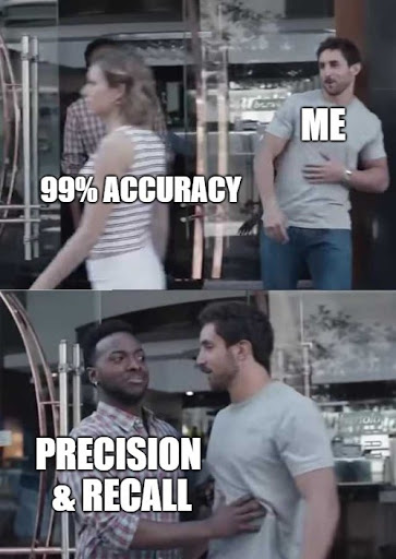

In [27]:
from sklearn.metrics import classification_report
target_names = ['paga', 'impaga']

print('TRAIN')
print('-------------------')
print(classification_report(y_train,log_reg2.predict(X_train),
                           target_names=target_names))

TRAIN
-------------------
              precision    recall  f1-score   support

        paga       0.93      1.00      0.96     89529
      impaga       0.58      0.04      0.07      6686

    accuracy                           0.93     96215
   macro avg       0.76      0.52      0.52     96215
weighted avg       0.91      0.93      0.90     96215



In [28]:
print('TEST')
print('-------------------')
print(classification_report(y_test,log_reg2.predict(X_test),
                           target_names=target_names))

TEST
-------------------
              precision    recall  f1-score   support

        paga       0.93      1.00      0.96     22383
      impaga       0.56      0.04      0.07      1671

    accuracy                           0.93     24054
   macro avg       0.75      0.52      0.52     24054
weighted avg       0.91      0.93      0.90     24054



In [ ]:
!pip install yellowbrick

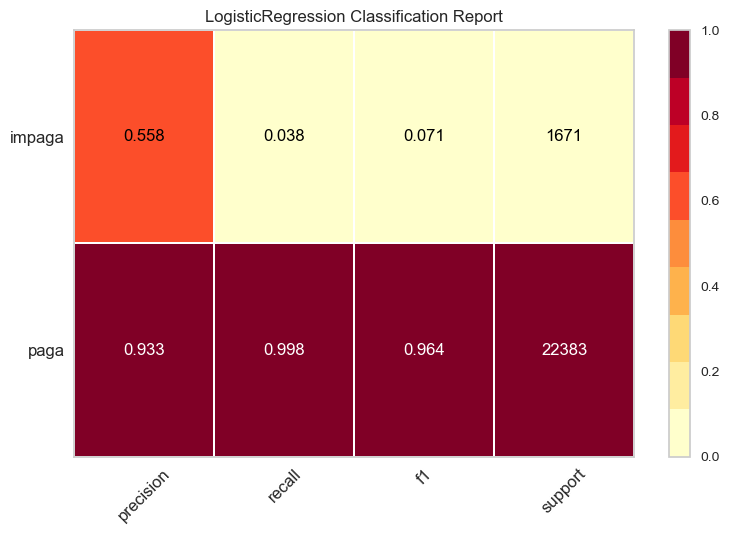

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [69]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(LogisticRegression(penalty='none'),
                                 classes=target_names,support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Confusion matrix

<AxesSubplot:>

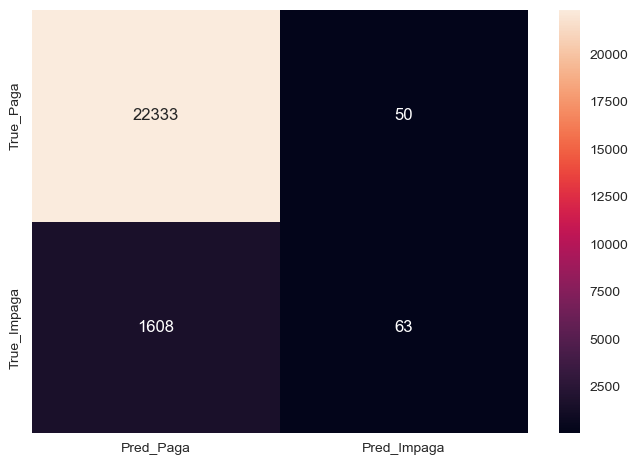

In [70]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, log_reg2.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, 
                          columns=['Pred_Paga', 'Pred_Impaga'],
                          index=['True_Paga', 'True_Impaga'])
sns.heatmap(c_matrix_df, 
           annot=True,
           fmt='g')

In [74]:
y_test.value_counts()

0    22383
1     1671
Name: target, dtype: int64

## ROC Curve

Vamos a calcularla "a mano", alterando el punto de corte para considerar impagos y calculando los ratios
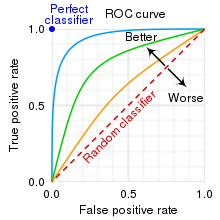
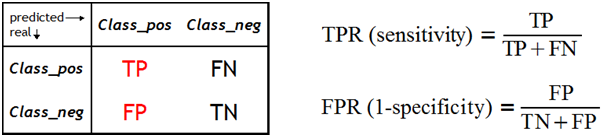

In [119]:
predictions = log_reg2.predict_proba(X_test)[:,1]
cut = 0.05
prob = predictions
pred = np.array([1 if p>cut else 0 for p in prob])
actual = y_test.values

# TP
tp = np.sum(pred[np.where(actual==1)])
# FN
fn = np.sum(pred[np.where(actual==1)]==0)
# TN
tn = np.sum(pred[np.where(actual==0)]==0)
# FP
fp = np.sum(pred[np.where(actual==0)])

print('TP',tp)
print('FN',fn)
print('TN',tn)
print('FP',fp)

TP 1302
FN 369
TN 9117
FP 13266


In [109]:
def tpr(prob,actual,cut):
    pred = np.array([1 if p>cut else 0 for p in prob])
    tp = np.sum(pred[np.where(actual==1)])
    fn = np.sum(pred[np.where(actual==1)]==0)
    tpr = tp/(tp+fn)
    return tpr

def fpr(prob, actual, cut):
    pred = np.array([1 if p>cut else 0 for p in prob])
    fp = np.sum(pred[np.where(actual==0)])
    tn = np.sum(pred[np.where(actual==0)]==0)
    fpr = fp/(tn+fp)
    return fpr
    
tprs = []
fprs = []
for cut in np.arange(0.0, 1.0, 0.01):
    tprs.append(tpr(predictions, y_test.values, cut))
    fprs.append(fpr(predictions, y_test.values, cut))


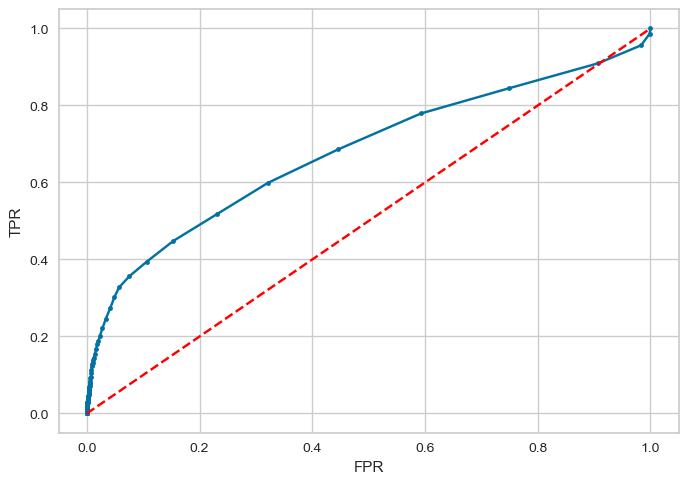

In [115]:
plt.plot(fprs,tprs,'.-')
plt.plot([0,1], [0,1], 'red', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR');

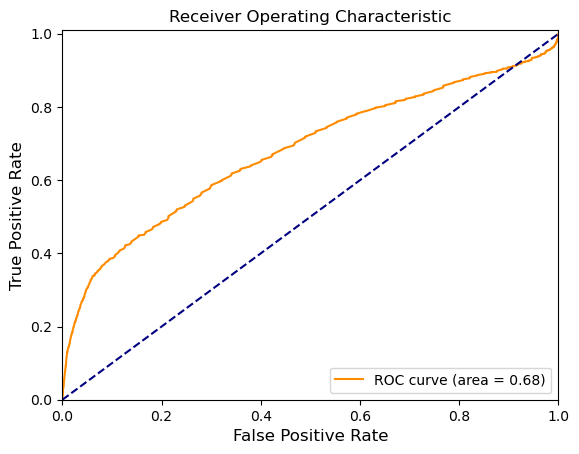

In [30]:
from sklearn.metrics import roc_curve, auc

predictions = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Threshold
Lo que realmente hace el `model.predict(X_train)` es obtener una probabilidad de ser 1, y a partir de un 0.5 (50%) se considera como 1. Este umbral del 50% lo podremos ir variando dependiendo de si nos interesa focalizar en los falsos positivos o los falsos negativos.

La media geométrica o G-Mean es una métrica para clasificación desbalanceada que nos da un balance entre sensitivity y specificity

G-Mean = sqrt(Sensitivity * Specificity)

donde:

Sensitivity = True Positive Rate  
Specificity = 1 – False Positive Rate

In [31]:
# Calculamos el G-Mean para cada threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('best threshold:',thresholds[ix])

best threshold: 0.07130275528264897


In [33]:
thres = thresholds[ix]
y_pred = [1 if p>thres else 0 for p in log_reg2.predict_proba(X_test)[:,1]]
print(classification_report(y_test, y_pred, target_names=target_names))

0.07130275528264897
              precision    recall  f1-score   support

        paga       0.96      0.70      0.81     22383
      impaga       0.13      0.59      0.21      1671

    accuracy                           0.69     24054
   macro avg       0.54      0.64      0.51     24054
weighted avg       0.90      0.69      0.77     24054



Otra opción es maximizar el F1 Score

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions[:,1])

f1_scores = 2*precision*recall/(precision+recall)
ix = np.nanargmax(f1_scores)
print('F1 score', f1_scores[ix])
print('Best threshold', thresholds[ix])

F1 score 0.3143254520166898
Best threshold 0.11626478796584892


C:\Users\Rafa\AppData\Local\Temp\ipykernel_6604\2405744641.py:4: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2*precision*recall/(precision+recall)


In [135]:
thres = thresholds[ix]
y_pred = [1 if p>thres else 0 for p in log_reg2.predict_proba(X_test)[:,1]]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        paga       0.95      0.94      0.94     22383
      impaga       0.29      0.34      0.31      1671

    accuracy                           0.90     24054
   macro avg       0.62      0.64      0.63     24054
weighted avg       0.90      0.90      0.90     24054



Dependiendo del problema, nos interesará maximizar unas métricas u otras

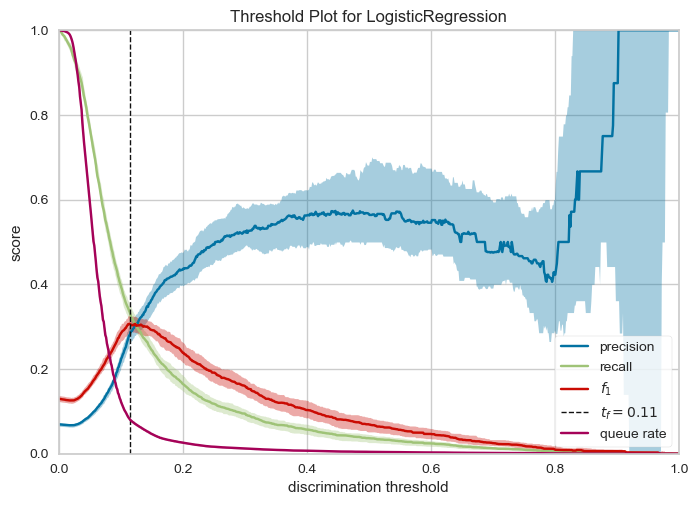

In [35]:
from yellowbrick.classifier import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
classes = ["Default", "Pays"]

visualizer = DiscriminationThreshold(model)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

In [36]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

pred=model.predict_proba(X_test)


def f(punto_corte=0.5):
  y_pred=np.where(pred>punto_corte, 1, 0)
  conf_mat=pd.crosstab(y_test,
                       y_pred[:,1],
                       rownames=['Actual'],
                       colnames=['Predicted'])
    
  sns.heatmap(conf_mat, annot=True, fmt='g')



In [37]:
interact(f, punto_corte=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='punto_corte', max=1.0, step=0.01), Output()), _dom_c…

## Alternativas con datos desbalanceados 

Siempre aplicaremos estas técnicas en el **conjunto de train**. El conjunto de test no lo tocamos (nos sirve para saber cómo generaliza el modelo con datos futuros, con su proporción natural)

### 1. Undersampling
Consiste en reducir aleatoriamente los ejemplos de la clase mayoritaria para balancear las clases
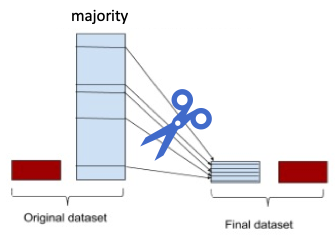

In [42]:
from imblearn.under_sampling import RandomUnderSampler

undersamp = RandomUnderSampler(random_state=42)

X_under, y_under = undersamp.fit_resample(X_train, y_train)

In [44]:
y_under.value_counts()

0    6686
1    6686
Name: target, dtype: int64

In [45]:
log_reg_under = LogisticRegression(penalty='none')
log_reg_under.fit(X_under, y_under)

LogisticRegression(penalty='none')

In [46]:
print('TEST Undersample')
print(classification_report(y_test, 
                           log_reg_under.predict(X_test),
                           target_names=target_names))

TEST Undersample
              precision    recall  f1-score   support

        paga       0.97      0.84      0.90     22383
      impaga       0.22      0.61      0.33      1671

    accuracy                           0.82     24054
   macro avg       0.59      0.73      0.61     24054
weighted avg       0.91      0.82      0.86     24054



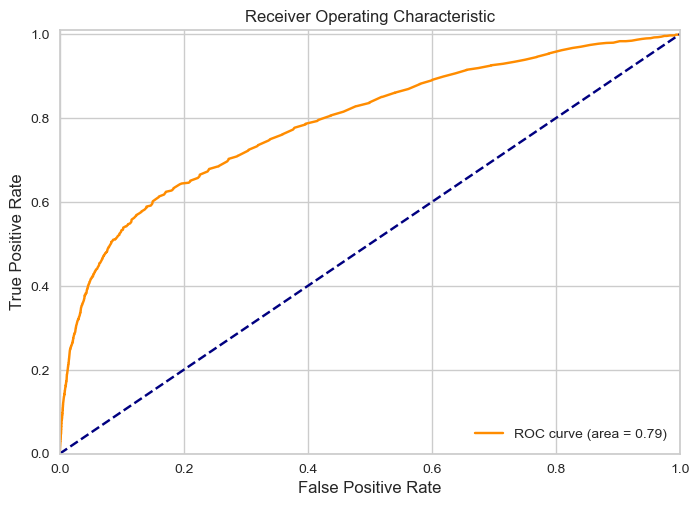

In [47]:
from sklearn.metrics import roc_curve, auc

predictions = log_reg_under.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 2. Oversampling
Consiste en crear muestras sintéticas de la clase minoritaria. Uno de los métodos más utilizados para ello es **SMOTE**
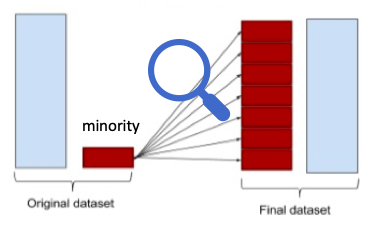
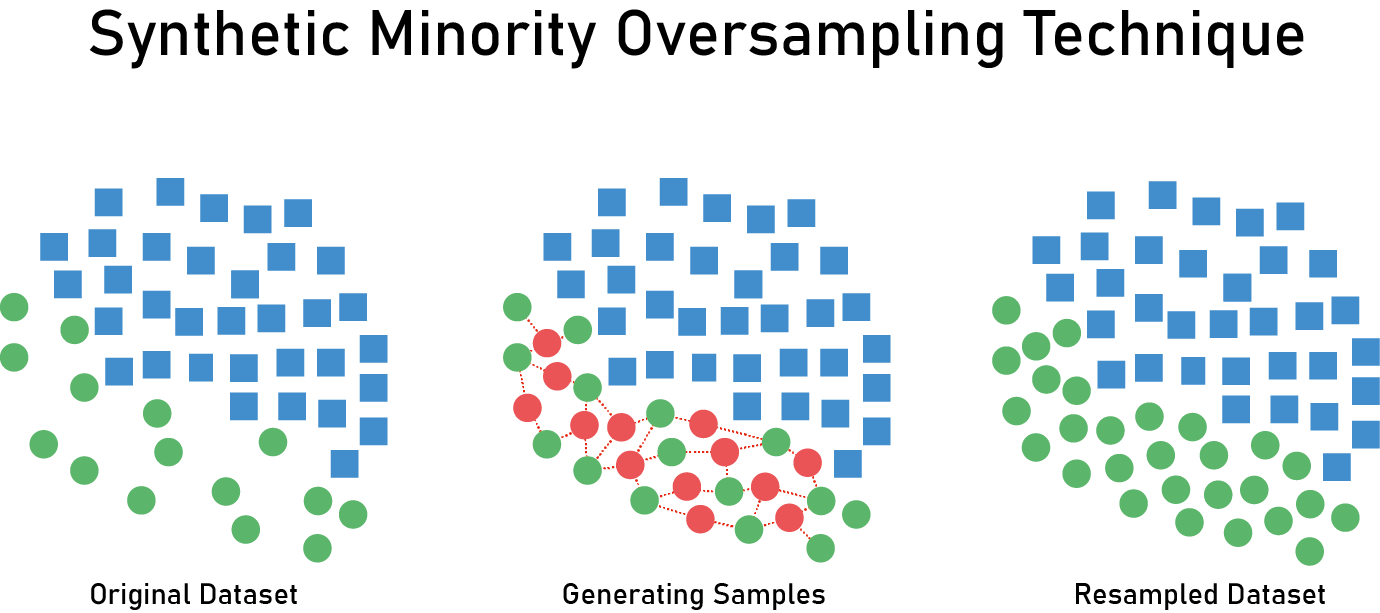

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [49]:
y_smote.value_counts()

0    89529
1    89529
Name: target, dtype: int64

In [51]:
log_reg_smote = LogisticRegression(penalty='none')
log_reg_smote.fit(X_smote, y_smote)

LogisticRegression(penalty='none')

In [52]:
print('TEST Oversample')
print(classification_report(y_test, 
                           log_reg_smote.predict(X_test),
                           target_names=target_names))

TEST Oversample
              precision    recall  f1-score   support

        paga       0.97      0.79      0.87     22383
      impaga       0.18      0.62      0.28      1671

    accuracy                           0.78     24054
   macro avg       0.57      0.71      0.58     24054
weighted avg       0.91      0.78      0.83     24054



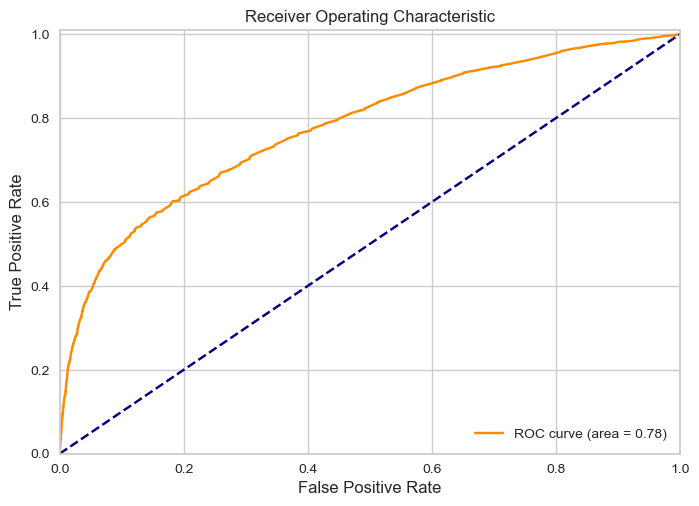

In [53]:
from sklearn.metrics import roc_curve, auc

predictions = log_reg_smote.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 3. Class-Weights
Algunos algoritmos permiten penalizar cuando el modelo se equivoca en la clase minoritaria

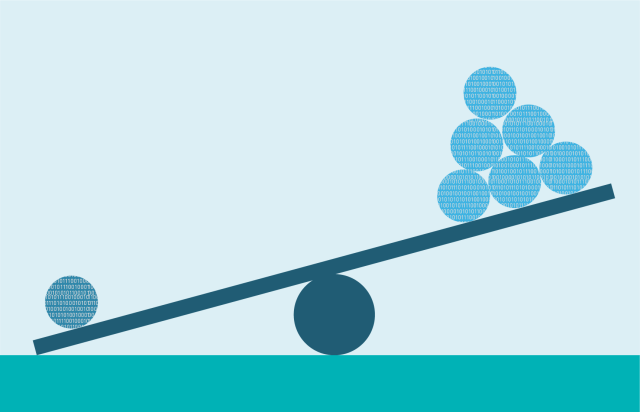

El peso que le damos a cada clase depende de cómo de desbalanceado esté el target:  

$\text{weight}_j=\text{muestras_totales}/ (\text{n_clases}* \text{muestras}_j)$

In [58]:
muestras_totales = y_train.shape[0]
n_clases = len(y_train.unique())
muestras_0 = np.sum(y_train==0)
muestras_1 = np.sum(y_train==1)

weight_0 = muestras_totales/(n_clases*muestras_0)
weight_1 = muestras_totales/(n_clases*muestras_1)

weight_0, weight_1

(0.537339856359392, 7.195258749626085)

In [59]:
log_reg_weights = LogisticRegression(penalty='none',
                                    class_weight='balanced')

log_reg_weights.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [60]:
print('TEST Class Weights')
print(classification_report(y_test, 
                           log_reg_weights.predict(X_test),
                           target_names=target_names))

TEST Class Weights
              precision    recall  f1-score   support

        paga       0.97      0.82      0.89     22383
      impaga       0.20      0.61      0.30      1671

    accuracy                           0.80     24054
   macro avg       0.58      0.71      0.59     24054
weighted avg       0.91      0.80      0.84     24054



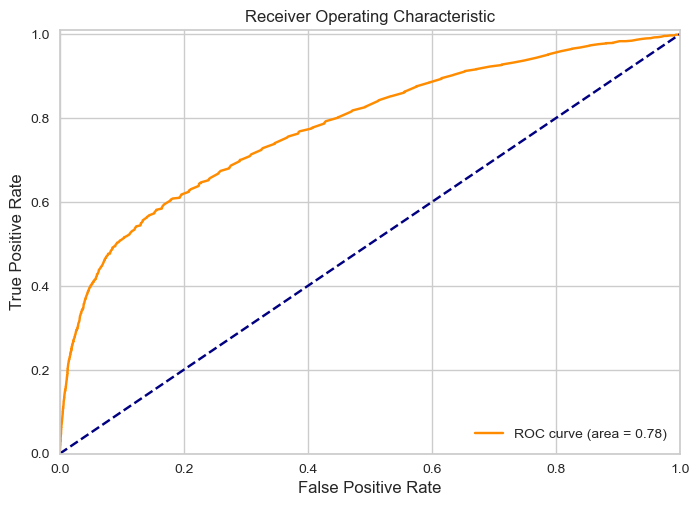

In [61]:
from sklearn.metrics import roc_curve, auc

predictions = log_reg_weights.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

En este caso funciona mejor el undersampling, pero no hay una regla general y la mejor estrategia dependerá de cada problema

### Lift

Ya tenemos nuestro modelo definitivo. Para ver qué tal funciona por
tramos de score, suele utilizarse el lift

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

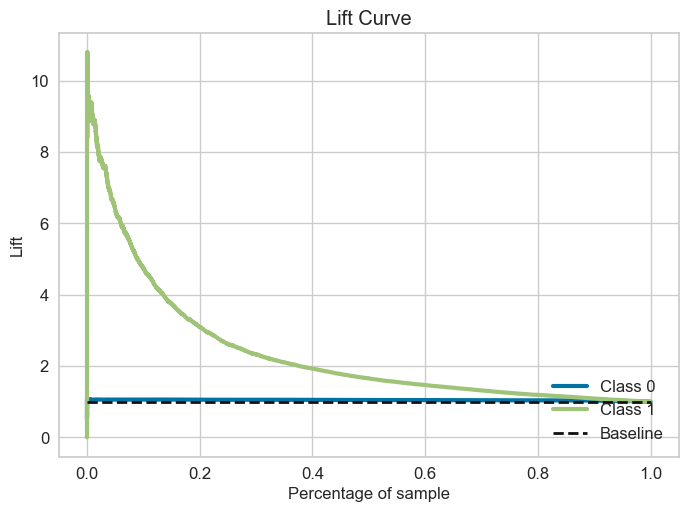

In [67]:
import scikitplot as skplt

target_prob = log_reg_under.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, target_prob)


In [68]:
pred_proba_1s = target_prob[:,1]
pred_proba_1s

array([0.28375913, 0.27205702, 0.33345279, ..., 0.1217827 , 0.40809452,
       0.522979  ])

In [93]:
pc = 99
percen = np.percentile(pred_proba_1s, pc)
percen

0.976966003834527

In [94]:
np.mean(y_test==1)

0.06946869543527064

In [95]:
np.mean(y_test[pred_proba_1s>percen]==1)

0.6265560165975104

In [96]:
lift = np.mean(y_test[pred_proba_1s>percen]==1)/np.mean(y_test==1)
lift

9.019256985778885

In [97]:
lifts = []
for pc in [10,20,30,40,50,60,70,80,90]:
    percen = np.percentile(pred_proba_1s, pc)
    print('Lift percentil',pc,'(',np.round(percen,2),'):',np.mean(y_test[pred_proba_1s>=percen]==1)/np.mean(y_test==1))
    lifts.append(np.mean(y_test[pred_proba_1s>=percen]==1)/np.mean(y_test==1))

Lift percentil 10 ( 0.22 ): 1.0824377133563334
Lift percentil 20 ( 0.27 ): 1.192288234534093
Lift percentil 30 ( 0.3 ): 1.3006087687955716
Lift percentil 40 ( 0.33 ): 1.4650587529977508
Lift percentil 50 ( 0.37 ): 1.6501438256890306
Lift percentil 60 ( 0.4 ): 1.9134058854386005
Lift percentil 70 ( 0.44 ): 2.321449826591455
Lift percentil 80 ( 0.49 ): 3.083791517055656
Lift percentil 90 ( 0.63 ): 4.744477823991786


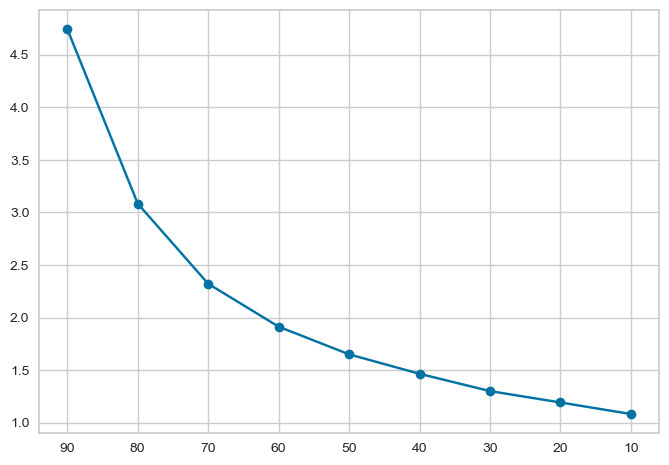

In [99]:
plt.plot([10,20,30,40,50,60,70,80,90],lifts,'o-')
plt.gca().invert_xaxis()

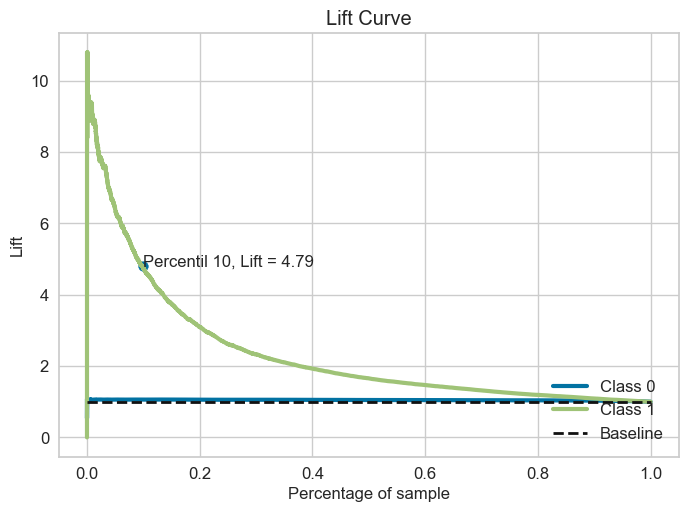

In [100]:
skplt.metrics.plot_lift_curve(y_test, target_prob)
plt.scatter(0.1,4.7944)
plt.text(0.1,4.7944,"Percentil 10, Lift = 4.79")
plt.show()